**Structure des bandes électroniques de ScCuO₂**

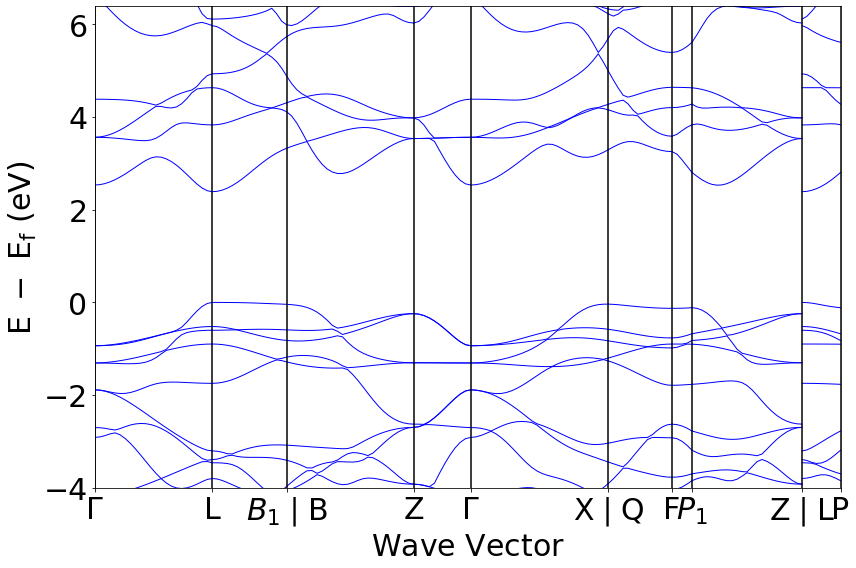

In [395]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice as lattice, Structure
from pprint import pprint
from IPython.display import Markdown, display
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
def printmd(string):
    display(Markdown(string))


with MPRester("Wn9s8arGa4zDtsqw59e") as m:
    structure = m.get_structure_by_material_id("mp-4636")
    w = CifWriter(structure)
    w.write_file('mystructure.cif')
       
    bands = m.get_bandstructure_by_material_id("mp-4636")
    bandsplot = BSPlotter(bands)
    printmd('**Structure des bandes électroniques de ScCuO\u2082**')
    a = bandsplot.show()
    b = bandsplot.bs_plot_data()

In [396]:
printmd('**Gap direct**')
print("Bande interdite  :" , bands.get_band_gap())
print('')
print('Effectivement, on peut voir que pour L-L, le gap (largeur entre la bande de valence de plus haute énergie et la bande de conduction de plus basse énergie) est direct. En effet, les extrema de ces deux bandes coïncident : la différence entre les vecteurs d onde de ces deux extrema est nulle, l electron ne doit donc pas dévier pour atteindre la bande de conduction de plus basse énergie.')
print('La différence d énergie entre la dernière bande de valence et la première bande de conduction étant de 2.39 eV, il s agit d un semi-conducteur.')
print('\n')

printmd('**Vecteurs d onde**')
e = b.get('ticks')
print('')
print(e.get('label'))
print('')
print('Notons que gamma est le centre de la zone de Brillouin.')
print('\n')
printmd('**Distances auxquelles les marqueurs (gamma, L, Z...) doivent être mis, en partant de l origine**')
dist=e.get('distance')
print(dist)
print('\n')


**Gap direct**

Bande interdite  : {'direct': True, 'energy': 2.3904999999999994, 'transition': 'L-L'}

Effectivement, on peut voir que pour L-L, le gap (largeur entre la bande de valence de plus haute énergie et la bande de conduction de plus basse énergie) est direct. En effet, les extrema de ces deux bandes coïncident : la différence entre les vecteurs d onde de ces deux extrema est nulle, l electron ne doit donc pas dévier pour atteindre la bande de conduction de plus basse énergie.
La différence d énergie entre la dernière bande de valence et la première bande de conduction étant de 2.39 eV, il s agit d un semi-conducteur.




**Vecteurs d onde**


['$\\Gamma$', 'L', 'L', '$B_1$$\\mid$B', 'Z', 'Z', '$\\Gamma$', '$\\Gamma$', 'X$\\mid$Q', 'F', 'F', '$P_1$', '$P_1$', 'Z$\\mid$L', 'P']

Notons que gamma est le centre de la zone de Brillouin.




**Distances auxquelles les marqueurs (gamma, L, Z...) doivent être mis, en partant de l origine**

[0.0, 1.1330975566315087, 1.1330975566315087, 1.847791836963221, 3.069947032959024, 3.069947032959024, 3.6186135144110803, 3.6186135144110803, 4.944385392740693, 5.555462905307527, 5.555462905307527, 5.7478872465513415, 5.7478872465513415, 6.8063047429745085, 7.176942160664791]




In [397]:
branche1 = b.get('energy')[0] #entre gamma et L
branche2 = b.get('energy')[1] #entre L et B1|B
branche3 = b.get('energy')[2] #entre B1|B et Z
branche4 = b.get('energy')[3] #entre Z et gamma
branche5 = b.get('energy')[4] #entre gamma et X|Q
branche6 = b.get('energy')[5] #entre X|Q et F
branche7 = b.get('energy')[6] #entre F et P1
branche8 = b.get('energy')[7] #entre P1 et Z
branche9 = b.get('energy')[8] #entre ZL et P

print('Dernière bande de valence entre gamma et L :', branche1.get('1')[19])
print('')
print('Première bande de conduction entre L et B1|B : ', branche1.get('1')[20])

print('\n')                
print('L indice de la dernière bande de valence est donc 19 et celui de la première bande de conduction est 20. On voit bien qu entre le dernier élément de la dernière bande de valence et le premier élément de la bande de conduction, il y a un gap d énergie. Ces indices nous seront utiles pour la suite du travail.')

Dernière bande de valence entre gamma et L : [-0.9352, -0.9331, -0.9269000000000003, -0.9170000000000003, -0.9037000000000002, -0.8876, -0.8689, -0.8481000000000001, -0.8256000000000001, -0.8015000000000003, -0.7763, -0.7501000000000002, -0.7233, -0.6962000000000002, -0.6692, -0.6396000000000002, -0.6015000000000001, -0.5352000000000001, -0.42730000000000024, -0.30320000000000036, -0.18520000000000003, -0.08770000000000033, -0.022900000000000365, 0.0]

Première bande de conduction entre L et B1|B :  [2.5343999999999998, 2.542, 2.5645999999999995, 2.6009, 2.6491, 2.7074, 2.7736, 2.8454999999999995, 2.9205999999999994, 2.9955999999999996, 3.0645999999999995, 3.1178, 3.1432, 3.1357999999999997, 3.0995, 3.0403000000000002, 2.9623999999999997, 2.8693999999999997, 2.7657999999999996, 2.6582999999999997, 2.5559000000000003, 2.4695, 2.4112, 2.3904999999999994]


L indice de la dernière bande de valence est donc 19 et celui de la première bande de conduction est 20. On voit bien qu entre le der

In [398]:
"On calcule ici les distances entre chaque branche afin de pouvoir ensuite calculer la pente par la forme delta y/delta x "

distance1 = (dist)[1]-(dist)[0] #entre gamma et L
print('\n')
distance2 = (dist)[3]-(dist)[1] #entre L et B1|B
print('\n')
distance3 = (dist)[4]-(dist)[3] #entre B1|B et Z
print('\n')
distance4 = (dist)[6]-(dist)[4] #entre Z et gamma
print('\n')
distance5 = (dist)[8]-(dist)[6] #entre gamma et X|Q
print('\n')
distance6 = (dist)[9]-(dist)[8] #entre X|Q et F
print('\n')
distance7 = (dist)[11]-(dist)[9] #entre F et P1
print('\n')
distance8 = (dist)[13]-(dist)[11] #entre P1 et Z|L
print('\n')
distance9 = (dist)[14]-(dist)[13] #entre Z|L et P

In [399]:
printmd('**Pentes entre \u0393 et L**')
pente11 = ((branche1.get('1')[19])[len((branche1.get('1')[19]))-1] - (branche1.get('1')[19])[0])/(distance1) #dernière valence
pente12 = ((branche1.get('1')[20])[len((branche1.get('1')[20]))-1] - (branche1.get('1')[20])[0])/(distance1) #première conduction
print('Dernière bande de valence :', pente11)
print('Première bande de conduction :', pente12)
print('\n')

printmd('**Pentes entre L et B1|B**')
pente21 = ((branche2.get('1')[19])[len((branche2.get('1')[19]))-1] - (branche2.get('1')[19])[0])/(distance2)
pente22 = ((branche2.get('1')[20])[len((branche2.get('1')[20]))-1] - (branche2.get('1')[20])[0])/(distance2)
print('Dernière bande de valence :', pente21)
print('Première bande de conduction :',pente22)
print('\n')
        
printmd('**Pentes entre B1|B et Z**')
pente31 = ((branche3.get('1')[19])[len((branche3.get('1')[19]))-1] - (branche3.get('1')[19])[0])/(distance3)
pente32 = ((branche3.get('1')[20])[len((branche3.get('1')[20]))-1] - (branche3.get('1')[20])[0])/(distance3)
print('Dernière bande de valence :' , pente31)
print('Première bande de conduction :',pente32)
print('\n')
        
printmd('**Pentes entre Z et \u0393**')
pente41 = ((branche4.get('1')[19])[len((branche4.get('1')[19]))-1] - (branche4.get('1')[19])[0])/(distance4)
pente42 = ((branche4.get('1')[20])[len((branche4.get('1')[20]))-1] - (branche4.get('1')[20])[0])/(distance4)
print('Dernière bande de valence :',pente41)
print('Première bande de conduction :',pente42)
print('\n')

printmd('**Pentes entre \u0393 et X|Q**')
pente51 = ((branche5.get('1')[19])[len((branche5.get('1')[19]))-1] - (branche5.get('1')[19])[0])/(distance5)
pente52 = ((branche5.get('1')[20])[len((branche5.get('1')[20]))-1] - (branche5.get('1')[20])[0])/(distance5)
print('Dernière bande de valence :',pente51)
print('Première bande de conduction :',pente52)
print('\n')
        
printmd('**Pentes entre X|Q et F**')
pente61 = ((branche6.get('1')[19])[len((branche6.get('1')[19]))-1] - (branche6.get('1')[19])[0])/(distance6)
pente62 = ((branche6.get('1')[20])[len((branche6.get('1')[20]))-1] - (branche6.get('1')[20])[0])/(distance6)
print('Dernière bande de valence :',pente61)
print('Première bande de conduction :',pente62)
print('\n')
        
printmd('**Pentes entre F et P1**')
pente71 = ((branche7.get('1')[19])[len((branche7.get('1')[19]))-1] - (branche7.get('1')[19])[0])/(distance7)
pente72 = ((branche7.get('1')[20])[len((branche7.get('1')[20]))-1] - (branche7.get('1')[20])[0])/(distance7)
print('Dernière bande de valence :',pente71)
print('Première bande de conduction :',pente72)
print('\n')
        
printmd('**Pentes entre P1 et Z|L**')
pente81 = ((branche8.get('1')[19])[len((branche8.get('1')[19]))-1] - (branche8.get('1')[19])[0])/(distance8)
pente82 = ((branche8.get('1')[20])[len((branche8.get('1')[20]))-1] - (branche8.get('1')[20])[0])/(distance8)
print('Dernière bande de valence :',pente81)
print('Première bande de conduction :',pente82)
print('\n')
        
printmd('**Pentes entre Z|L et P**')
pente91 = ((branche9.get('1')[19])[len((branche9.get('1')[19]))-1] - (branche9.get('1')[19])[0])/(distance9)
pente92 = ((branche9.get('1')[20])[len((branche9.get('1')[20]))-1] - (branche9.get('1')[20])[0])/(distance9)
print('Dernière bande de valence :',pente91)
print('Première bande de conduction :',pente92)
print('\n')
print('Ces pentes vont nous permettre de trouver les directions dans lesquelles la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion ')

**Pentes entre Γ et L**

Dernière bande de valence : 0.8253481745915843
Première bande de conduction : -0.1269970084727644




**Pentes entre L et B1|B**

Dernière bande de valence : -0.05792686626900844
Première bande de conduction : 1.3110500892285144




**Pentes entre B1|B et Z**

Dernière bande de valence : -0.16470903258401814
Première bande de conduction : 0.17215489545791077




**Pentes entre Z et Γ**

Dernière bande de valence : -1.2621510943538694
Première bande de conduction : -1.8289799612766902




**Pentes entre Γ et X|Q**

Dernière bande de valence : 0.6774921196334878
Première bande de conduction : 0.5761926410465618




**Pentes entre X|Q et F**

Dernière bande de valence : -0.1480990514932449
Première bande de conduction : -0.06873105152172838




**Pentes entre F et P1**

Dernière bande de valence : 0.07119681383053711
Première bande de conduction : -2.343778323910448




**Pentes entre P1 et Z|L**

Dernière bande de valence : -0.12178559069139212
Première bande de conduction : 0.6921654285532504




**Pentes entre Z|L et P**

Dernière bande de valence : -0.3070386166328612
Première bande de conduction : 1.1191530595721493


Ces pentes vont nous permettre de trouver les directions dans lesquelles la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 


In [400]:
printmd('**Pour trouver les dispersions maximales et minimales, on regarde les pentes maximales et minimales**')
maxval = max(abs(pente11), abs(pente21), abs(pente31), abs(pente41), abs(pente51), abs(pente61), abs(pente71), abs(pente81), abs(pente91))
print('Pente maximale dernière bande de valence :', maxval, 'elle se situe donc entre Z et \u0393')
minval = min(abs(pente11), abs(pente21), abs(pente31), abs(pente41), abs(pente51), abs(pente61), abs(pente71), abs(pente81), abs(pente91))
print('Pente minimale dernière bande de valence :', minval, 'elle se situe donc entre L et B1|B')
maxcond = max(abs(pente12), abs(pente22), abs(pente32), abs(pente42), abs(pente52), abs(pente62), abs(pente72), abs(pente82), abs(pente92))
print('Pente maximale première bande de conduction :', maxcond, 'elle se situe donc entre F et P1')
mincond = min(abs(pente12), abs(pente22), abs(pente32), abs(pente42), abs(pente52), abs(pente62), abs(pente72), abs(pente82), abs(pente92))
print('Pente minimale première bande de conduction :', mincond, 'elle se situe donc entre X|Q et F')

**Pour trouver les dispersions maximales et minimales, on regarde les pentes maximales et minimales**

Pente maximale dernière bande de valence : 1.2621510943538694 elle se situe donc entre Z et Γ
Pente minimale dernière bande de valence : 0.05792686626900844 elle se situe donc entre L et B1|B
Pente maximale première bande de conduction : 2.343778323910448 elle se situe donc entre F et P1
Pente minimale première bande de conduction : 0.06873105152172838 elle se situe donc entre X|Q et F


- Dans la direction L-B1|B (jaune), la dernière bande de valence présente la dispersion la moins grande


- Dans la direction Z-Γ (rouge), la dernière bande de valence présente la dispersion la plus grande


- Dans la direction X|Q-F (noir), la première bande de conduction présente la dispersion la moins grande


- Dans la direction F-P₁ (bleu), la première bande de conduction présente la dispersion la plus grande


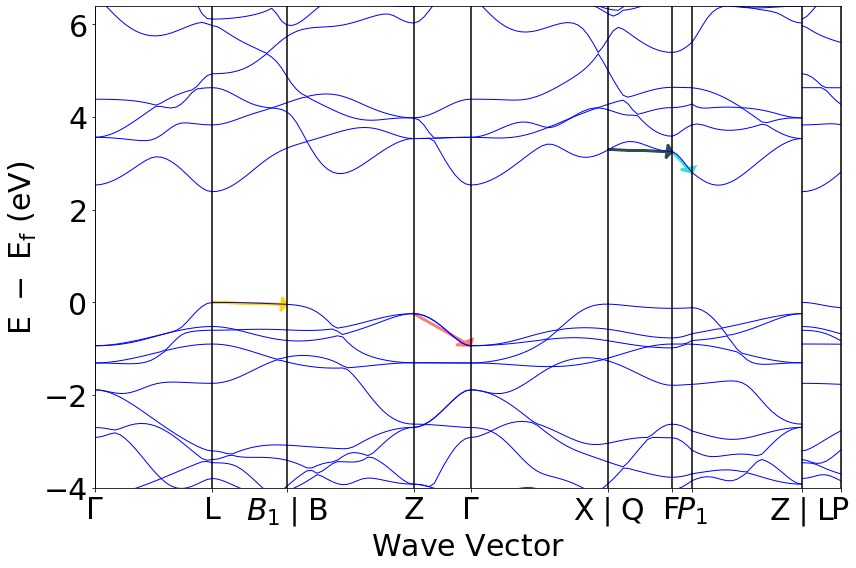

In [401]:
a = bandsplot.get_plot()
vmaxval = plt.arrow((dist)[5], (branche4.get('1')[19])[0], distance4, (branche4.get('1')[19])[len(branche4.get('1')[19]) - 1] - (branche4.get('1')[19])[0], head_width=0.2, head_length=0.1, linewidth=2.5, color='salmon',length_includes_head=True)
vminval = plt.arrow((dist)[1], (branche2.get('1')[19])[0], distance2, (branche2.get('1')[19])[len(branche2.get('1')[19]) - 1] - (branche2.get('1')[19])[0], head_width=0.3, head_length=0.05, linewidth=2.5, color='gold',length_includes_head=True)
vmaxcond = plt.arrow((dist)[9], (branche7.get('1')[20])[0], distance7, (branche7.get('1')[20])[len(branche7.get('1')[20]) - 1] - (branche7.get('1')[20])[0], head_width=0.15, head_length=0.1, linewidth=2.5, color='turquoise',length_includes_head=True)
vmincond = plt.arrow((dist)[8], (branche6.get('1')[20])[0], distance6, (branche6.get('1')[20])[len(branche6.get('1')[20]) - 1] - (branche6.get('1')[20])[0], head_width=0.3, head_length=0.05, linewidth=2.5, color='darkslategrey',length_includes_head=True)

print('- Dans la direction L-B1|B (jaune), la dernière bande de valence présente la dispersion la moins grande' )
print('\n')
print('- Dans la direction Z-\u0393 (rouge), la dernière bande de valence présente la dispersion la plus grande')
print('\n')
print('- Dans la direction X|Q-F (noir), la première bande de conduction présente la dispersion la moins grande' )
print('\n')
print('- Dans la direction F-P\u2081 (bleu), la première bande de conduction présente la dispersion la plus grande')

In [402]:
printmd('**Masse effective**')
print('Comme on suppose une dispersion parabolique, la masse effective est constante. Celle-ci est inversément proportionnelle à la courbure de la dispersion de l energie dans l espace des k. Plus la bande est plate, plus la masse effective est grande. Pour un minimum (dans le cas de la bande de conduction), la masse effective sera positive. Pour un maximum (bande de valence), elle sera négative.')
print('La masse effective peut être trouvée via la relation suivante : 1/m* = (2\u03C0/h)\u00B2 * (d\u00B2E/dk\u00B2)')
print('')
print('Précisions sur les unités :')
print('- L énergie est en eV')
print('- k est en 1/Angstrom')
print('- h est en J*s')

**Masse effective**

Comme on suppose une dispersion parabolique, la masse effective est constante. Celle-ci est inversément proportionnelle à la courbure de la dispersion de l energie dans l espace des k. Plus la bande est plate, plus la masse effective est grande. Pour un minimum (dans le cas de la bande de conduction), la masse effective sera positive. Pour un maximum (bande de valence), elle sera négative.
La masse effective peut être trouvée via la relation suivante : 1/m* = (2π/h)² * (d²E/dk²)

Précisions sur les unités :
- L énergie est en eV
- k est en 1/Angstrom
- h est en J*s


Pour la dernière bande de valence, on a le maximum en (L,0). On va trouver un autre point pour pouvoir déterminer les coefficients de l équation d une parabole.
L équation d une parabole est de la forme : y=ax² + bx + c. Nous avons 3 équations à trois inconnues puisque la dérivée première d un extremum est égale à 0.

En résolvant ce système d équation on trouve :
a = -6.667133610874091
b= 15.10902560843448
c= -8.560000000000002


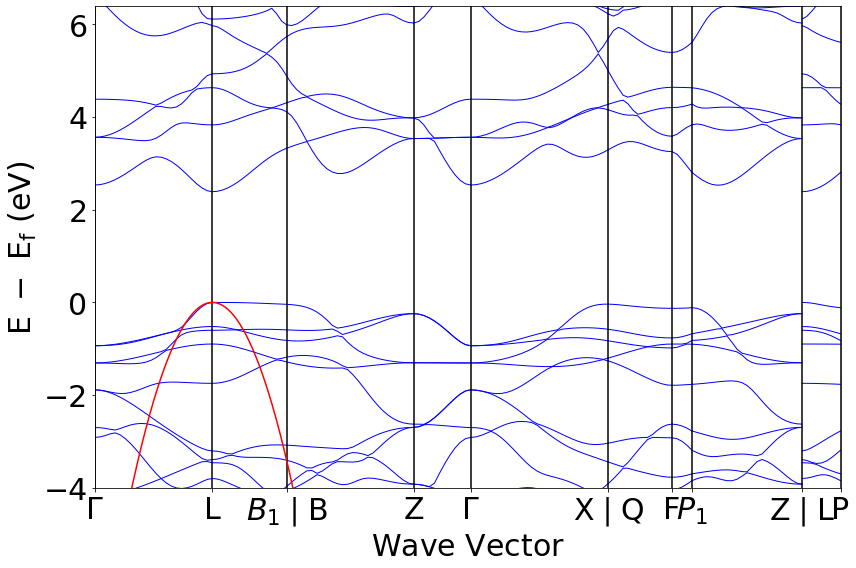

In [403]:
print('Pour la dernière bande de valence, on a le maximum en (L,0). On va trouver un autre point pour pouvoir déterminer les coefficients de l équation d une parabole.')
print('L équation d une parabole est de la forme : y=ax\u00B2 + bx + c. Nous avons 3 équations à trois inconnues puisque la dérivée première d un extremum est égale à 0.')
print('')

"sx et sy représentent les coordonnées du sommet et px et py sont les coordonnées du point que j ai choisi grâce aux plots interactifs qu on peut trouver sur Materials Project"

sx = (dist)[1]
sy = 0
px = (dist)[1]*3/4
py = -0.535
a2 = (py-sy)/(px-sx)**2

print('En résolvant ce système d équation on trouve :')
print('a =', a2)
b=-2*sx*a2
print('b=', b)
c=sy+a2*sx*sx
print('c=',c)
a = bandsplot.get_plot()

def f(x):
    return a2*x**2+ b*x + c
x=np.arange(0.0,2,0.01)
y = f(x)
plt.plot(x,y,"r-")

In [404]:
print('La masse peut alors être calculée. La dérivée seconde vaut 2a =', 2*a2, 'eV*A\u00B2')
ev = 2*a2*1.602*10**(-19) #en effet, 1eV = 1.602*10**(-19)J
print('En J*A\u00B2, cela vaut :', ev, 'J*A\u00B2')
J = ev*10**(-20)
print('En joule/m\u00B2, sachant que 1A = 10^(-10)m, on obtient : ', J, 'J*m\u00B2')
hbar = 6.63*10**(-34)/(2*np.pi)
m = (1/J)*(hbar**2)
print('On peut dès lors calculer la masse effective, elle vaut : m*= ', m, 'kg' )

La masse peut alors être calculée. La dérivée seconde vaut 2a = -13.334267221748181 eV*A²
En J*A², cela vaut : -2.136149608924059e-18 J*A²
En joule/m², sachant que 1A = 10^(-10)m, on obtient :  -2.1361496089240588e-38 J*m²
On peut dès lors calculer la masse effective, elle vaut : m*=  -5.212375011845683e-31 kg


Pour la première bande de conduction, on a le minimum en (L, 2.39), on prend alors les coordonnées d un autre point pour déterminer les coefficients a, b, c, comme fait ci-dessus.
a = 4.685686425586275
b= -10.61867967994647
c= 8.405999999999999


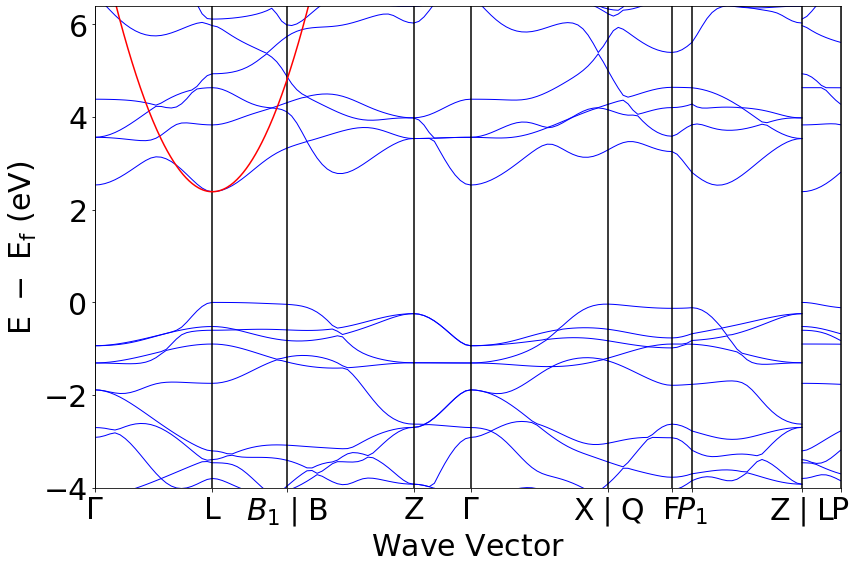

In [405]:
print('Pour la première bande de conduction, on a le minimum en (L, 2.39), on prend alors les coordonnées d un autre point pour déterminer les coefficients a, b, c, comme fait ci-dessus.')
sx1 = (dist)[1]
sy1 = 2.39
px1 = (dist)[1]*3/4
py1 = 2.766
a1 = (py1-sy1)/(px1-sx1)**2
print('a =', a1)
b1=-2*sx1*a1
print('b=',b1)
c1=sy1+a1*sx1*sx1
print('c=', c1)
a = bandsplot.get_plot()
def g(x) :
    return (a1*(x)**2+ b1*x+ c1)
x=np.arange(0.0,2.2,0.01)
y=g(x)
plt.plot(x,y,"r-")

In [394]:
print('La masse peut alors être calculée. La dérivée seconde vaut 2*a =', 2*a1, 'eV*A\u00B2' )
ev1 = 2*a1*1.602*10**(-19) #en effet, 1eV = 1.602*10**(-19)J
print('En J/A\u00B2, cela vaut :', ev1, 'J*A\u00B2')
J1 = ev1*10**(-20)
print('En joule/m\u00B2, sachant que 1A = 10^(-10)m, on obtient : ', J1, 'J*m\u00B2')
m = (1/J1)*(hbar**2)
print('On peut dès lors calculer la masse effective, elle vaut : m*= ', m, 'kg' )

La masse peut alors être calculée. La dérivée seconde vaut 2*a = 9.37137285117255 eV*A²
En J/A², cela vaut : 1.5012939307578426e-18 J*A²
En joule/m², sachant que 1A = 10^(-10)m, on obtient :  1.5012939307578424e-38 J*m²
On peut dès lors calculer la masse effective, elle vaut : m*=  7.41654423228043e-31 kg
